In [6]:
#2. Importing Required Libraries
#● Import the required libraries for the project to the Colab environment.
#● Import Pandas, NumPy, Seaborn, Matplotlib, Sklearn and Tensorflow libraries for data analysis.
!pip install keras-tuner --upgrade
import os
import pandas as pd
import seaborn as sns
import pylab as plt
import keras_tuner
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import layers, models
import keras

In [2]:
#data source: https://www.kaggle.com/competitions/dog-breed-identification/data
base_dir = "dog-breed-identification"
#base_dir = "/content/drive/MyDrive/dog-breed-identification"
images_list = [i.split(".")[0] for i in os.listdir(os.path.join(base_dir, "train"))]
label_list = pd.read_csv(os.path.join(base_dir, "labels.csv"), index_col=0)
label_list = label_list[label_list.index.isin(images_list)]

In [3]:
#3. Data Preprocessing
# ● In this section, prepare the data you have, for training the model.
# ● Create a dataframe that includes pixel values of images and the labels

dataset = label_list
dataset["filename"] = dataset.index + ".jpg"
dataset.reset_index(drop=True, inplace=True)

refactor_size = 128
resized_image_list = []
all_paths = []

for i in range(len(dataset)):
    image_path = os.path.join(base_dir, "train", dataset["filename"][i])
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    imgarr = np.array(img)
    resized_image_list.append(imgarr)
    all_paths.append(image_path)


#adding resized images pixel values to dataset
dataset["resized_images"] = resized_image_list

# ● Use Label Encoding or One-Hot Encoding techniques to deal with categorical targets.
le = LabelEncoder()
dataset["breed"] = le.fit_transform(dataset["breed"])

# ● Split your dataset into X_train,X_test, X_val, y_train, y_test and y_val

X_train, X_test, y_train, y_test = train_test_split(dataset["resized_images"], dataset["breed"], test_size=0.2, random_state=1)
# converting x_train and x_test to numpy array
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

print(X_train.shape, y_train.shape)

# ● Normalize the pixel values.
X_train = X_train / 255
X_test = X_test / 255


(4858, 128, 128, 3) (4858,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

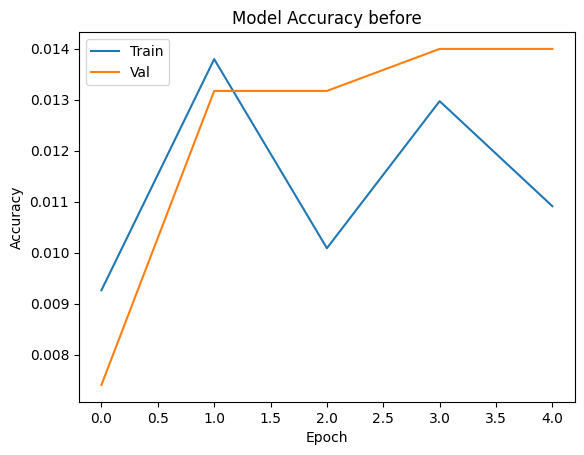

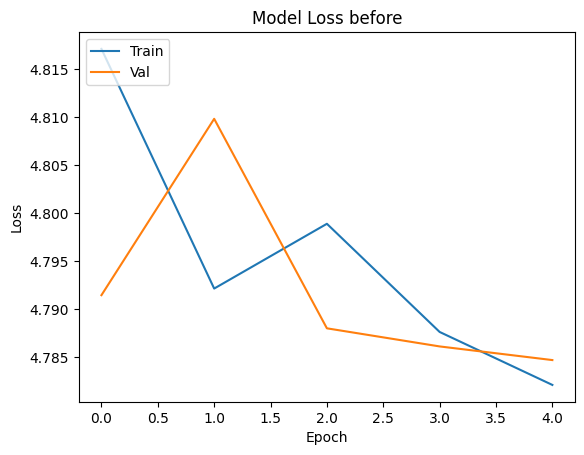

In [4]:
# 4. Building a Model
# ● Build a model using Tensorflow or Pytorch
# ● Your model should include Conv2D, MaxPooling2D, Flatten, Dense and Dropout.(Number of layers is up to you)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(refactor_size, refactor_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after MaxPooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Another Dropout layer after MaxPooling
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.25),  # Dropout layer after Conv2D
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.5),  # Dropout layer before the final Dense layer
    layers.Dense(120, activation='softmax')
])

# ● Compile your model and print the summary of the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ● Train your model using train and validation subsets
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# ● Plot model’s accuracy, validation accuracy, loss and validation loss
def plot_accuracy(model, before_after_flag):
    plt.plot(model.history.history['accuracy'])
    plt.plot(model.history.history['val_accuracy'])
    plt.title(f'Model Accuracy {before_after_flag}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig(f"model_accuracy_{before_after_flag}.png")
    plt.show(block=True)

def plot_loss(model, before_after_flag):
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title(f'Model Loss {before_after_flag}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.savefig(f"model_loss_{before_after_flag}.png")
    plt.show(block=True)

plot_accuracy(model, 'before')
plot_loss(model, 'before')


Trial 2 Complete [00h 01m 34s]
val_accuracy: 0.01563785970211029

Best val_accuracy So Far: 0.01563785970211029
Total elapsed time: 00h 03m 43s
Results summary
Results in project/Dog_Breed_Classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.01563785970211029

Trial 0 summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.015089162935813269
Epoch 1/5
152/152 [==============================] - 5s 28ms/step - loss: 4.7761 - accuracy: 0.0107 - val_loss: 4.7880 - val_accuracy: 0.0140
Epoch 2/5
152/152 [==============================] - 5s 32ms/step - loss: 4.7768 - accuracy: 0.0128 - val_loss: 4.7885 - val_accuracy: 0.0156
Epoch 3/5
152/152 [==============================] - 4s 29ms/step - loss: 4.7764 - accuracy: 0.0107 - val_loss: 4.7874 - val_accuracy: 0.0156
Epoch 4/5
152/152 [==============================] - 4s 24ms/step - loss: 4.7766 - accuracy: 0.0107 - val_loss: 4.78

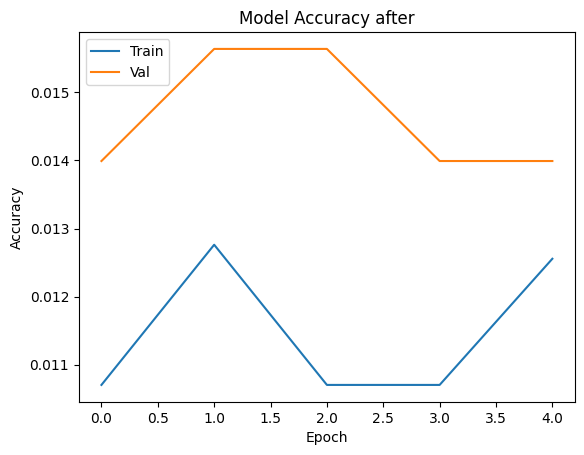

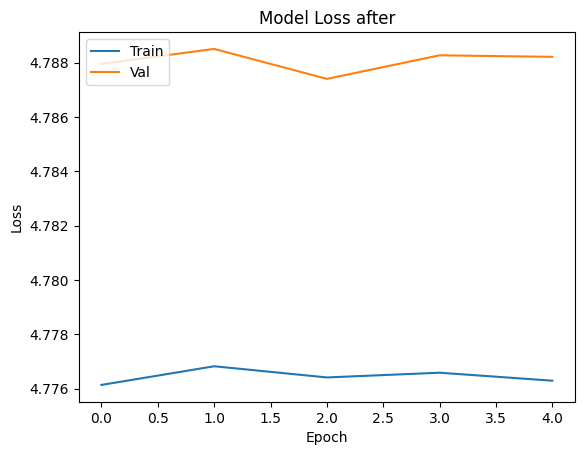

In [5]:
# 5. Hyper-parameter Optimization
# ● Optimize the hyper-parameters of the model.

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(refactor_size, refactor_size, 3)))
    model.add(keras.layers.Dense(units=hp.Int('units',
                                              min_value=32,
                                              max_value=64,
                                              step=32),
                                 activation='relu'))
    model.add(keras.layers.Dense(120, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = keras_tuner.tuners.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Dog_Breed_Classification')

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
tuner.results_summary()
best_model = tuner.get_best_models()[0]

#  ● Train your model with the optimized parameters and show the results.
best_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
plot_accuracy(best_model, 'after')
plot_loss(best_model, 'after')
